## 深層学習の基礎
### 大問1

In [ ]:
import numpy as np

# シグモイド関数とその微分
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# 恒等関数
def identity_function(x):
    return x

# ニューラルネットワーククラス
class FourLayerNeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # 重みとバイアスの初期化
        self.params = {
            "W1": np.random.randn(input_size, hidden1_size),
            "b1": np.zeros(hidden1_size),
            "W2": np.random.randn(hidden1_size, hidden2_size),
            "b2": np.zeros(hidden2_size),
            "W3": np.random.randn(hidden2_size, output_size),
            "b3": np.zeros(output_size)
        }

    # 順伝播
    def forward(self, x):
        self.x = x
        self.z1 = np.dot(x, self.params["W1"]) + self.params["b1"]
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.params["W2"]) + self.params["b2"]
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.params["W3"]) + self.params["b3"]
        self.a3 = identity_function(self.z3)
        return self.a3

    # 損失関数（2乗誤差）
    def loss(self, y, t):
        return 0.5 * np.sum((y - t) ** 2)

    # 逆伝播（バックプロパゲーション）
    def backward(self, t):
        # 出力層
        delta3 = self.a3 - t
        self.grads = {
            "W3": np.dot(self.a2.T, delta3),
            "b3": np.sum(delta3, axis=0)
        }
        # 隠れ層2
        delta2 = np.dot(delta3, self.params["W3"].T) * sigmoid_derivative(self.z2)
        self.grads["W2"] = np.dot(self.a1.T, delta2)
        self.grads["b2"] = np.sum(delta2, axis=0)
        # 隠れ層1
        delta1 = np.dot(delta2, self.params["W2"].T) * sigmoid_derivative(self.z1)
        self.grads["W1"] = np.dot(self.x.T, delta1)
        self.grads["b1"] = np.sum(delta1, axis=0)

    # パラメータの更新
    def update(self, learning_rate=0.01):
        for key in self.params.keys():
            self.params[key] -= learning_rate * self.grads[key]

# サンプルデータ生成
np.random.seed(0)
N = 100  # サンプル数
D_in = 2  # 入力次元
D_hidden1 = 4  # 隠れ層1の次元
D_hidden2 = 3  # 隠れ層2の次元
D_out = 1  # 出力次元

# 入力データと教師データ
x_data = np.random.rand(N, D_in)
t_data = np.sum(x_data, axis=1, keepdims=True)  # 教師データを単純な和とする

# ニューラルネットワークの初期化
nn = FourLayerNeuralNetwork(input_size=D_in, hidden1_size=D_hidden1, hidden2_size=D_hidden2, output_size=D_out)

# 学習
epochs = 1000
learning_rate = 0.1
for epoch in range(epochs):
    # 順伝播
    y_pred = nn.forward(x_data)
    # 損失計算
    loss = nn.loss(y_pred, t_data)
    # 逆伝播
    nn.backward(t_data)
    # パラメータ更新
    nn.update(learning_rate=learning_rate)
    # 進捗表示
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# テスト出力
print("予測値: ", nn.forward(x_data[:5]))
print("実際の値: ", t_data[:5])


### __init__ メソッドとは?
- クラスのコンストラクタ(クラス内に定義された関数であり、コンストラクタという特別なもの)
- インスタンスの初期化を行う(クラスは設計図、インスタンスはその設計図からつくられた実体)のようなイメージ

### selfとは?
- インスタンス自身を指すキーワード
- クラスの中で定義された属性やメソッドにアクセスするために使う
- selfがないと、クラスの中でどのインスタンスを対象にしているかが不明になる

### 大問2

Epoch 0, Loss: 356.3101
Epoch 100, Loss: 27.7506
Epoch 200, Loss: 8.6682
Epoch 300, Loss: 3.4684
Epoch 400, Loss: 2.0596
Epoch 500, Loss: 1.5677
Epoch 600, Loss: 1.3429
Epoch 700, Loss: 1.2186
Epoch 800, Loss: 1.1400
Epoch 900, Loss: 1.0846

予測値と実際の値（最初の5サンプル）:
予測値: [[10.63372945]
 [27.23031907]
 [22.42184183]
 [18.19259195]
 [ 4.92053869]]
実際の値: [[11.32325063]
 [28.22242184]
 [22.05157903]
 [15.97218561]
 [ 4.46088733]]


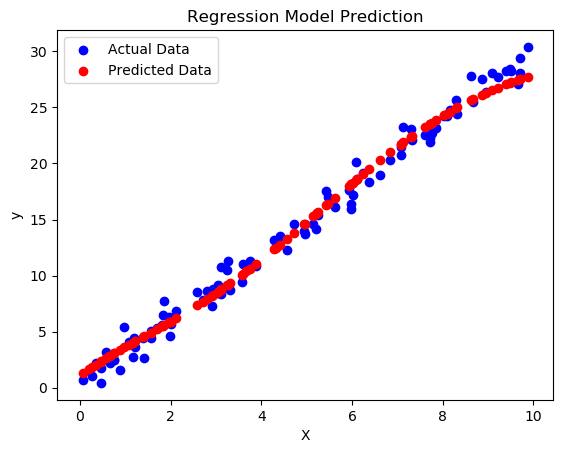

In [1]:
import numpy as np

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# シグモイド関数の微分
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# 平均二乗誤差
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# サンプルデータ生成
np.random.seed(42)  # 再現性のためのシード
N = 100  # サンプル数
X = np.random.rand(N, 1) * 10  # 0〜10のランダムな値
y = 3 * X + np.random.randn(N, 1)  # y = 3x + ノイズ

# ニューラルネットワーククラス
class RegressionNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        # 順伝播
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2  # 恒等関数

    def backward(self, X, y, y_pred):
        # 出力層の誤差
        delta2 = y_pred - y
        self.dW2 = np.dot(self.a1.T, delta2) / len(y)
        self.db2 = np.sum(delta2, axis=0) / len(y)

        # 隠れ層の誤差
        delta1 = np.dot(delta2, self.W2.T) * sigmoid_derivative(self.z1)
        self.dW1 = np.dot(X.T, delta1) / len(y)
        self.db1 = np.sum(delta1, axis=0) / len(y)

    def update(self, lr=0.01):
        # パラメータ更新
        self.W1 -= lr * self.dW1
        self.b1 -= lr * self.db1
        self.W2 -= lr * self.dW2
        self.b2 -= lr * self.db2

# ニューラルネットワークの初期化
input_size = 1
hidden_size = 10
output_size = 1
nn = RegressionNN(input_size, hidden_size, output_size)

# 学習
epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    # 順伝播
    y_pred = nn.forward(X)
    # 損失計算
    loss = mean_squared_error(y, y_pred)
    # 逆伝播
    nn.backward(X, y, y_pred)
    # パラメータ更新
    nn.update(lr=learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# テスト
print("\n予測値と実際の値（最初の5サンプル）:")
print("予測値:", nn.forward(X[:5]))
print("実際の値:", y[:5])
import matplotlib.pyplot as plt

# モデルの予測値
y_pred = nn.forward(X)

# 散布図を描画
plt.scatter(X, y, label="Actual Data", color="blue")
plt.scatter(X, y_pred, label="Predicted Data", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regression Model Prediction")
plt.show()

### 回帰タスクとは?
- 意味: 機械学習における問題設定。連続値を予測することが目的。
- 用途: 家の価格、温度、売上などの予測。
- 特徴: 問題を解くために、任意のアルゴリズム（線形回帰、決定木、ニューラルネットワークなど）を使用。

### 回帰分析とは?
- 意味: 統計学におけるデータ分析手法。変数間の関係性を明らかにする。
- 用途: データ間の相関や因果関係を解釈する。
- 特徴: 主に線形回帰や重回帰などの具体的な数式モデルを用いる。